In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, BaggingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [2]:
df1=pd.read_csv('train_kOBLwZA.csv')
df2=pd.read_csv('test_t02dQwI.csv')

In [3]:
print('Shape of Train dataset',df1.shape)
print('Shape of Test dataset',df2.shape)

Shape of Train dataset (8523, 12)
Shape of Test dataset (5681, 11)


In [4]:
train=df1.copy()
test_1=df2.copy()

In [5]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
df1['Data']='train'
df2['Data']='test'
df2['Item_Outlet_Sales']=np.nan 

In [8]:
print('Shape of Train dataset',df1.shape)
print('Shape of Test dataset',df2.shape)

Shape of Train dataset (8523, 13)
Shape of Test dataset (5681, 13)


In [9]:
df1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Data                            0
dtype: int64

In [10]:
## for creating id of product from their identifler 

In [11]:
df1.Item_Identifier[0][:2]

'FD'

In [12]:
a=[]

for i in range(0,len(df1.Item_Identifier)):
    a.append(df1.Item_Identifier[i][:2])

In [13]:
df1['Item_ID']=pd.Series(a)

In [14]:
df2.Item_Identifier[0][:2]

'FD'

In [15]:
b=[]

for i in range(0,len(df2.Item_Identifier)):
    b.append(df2.Item_Identifier[i][:2])

In [16]:
df2['Item_ID']=pd.Series(b)

In [17]:
## merging Data set for EDA
df=pd.concat([df1,df2],axis=0)
df.tail()

,Data,Item_Fat_Content,Item_ID,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
5676,test,Regular,FD,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1
5677,test,Regular,FD,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2
5678,test,Low Fat,NC,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1
5679,test,Regular,FD,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1
5680,test,Regular,FD,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1


In [18]:
print('Shape of total dataset',df.shape)

Shape of total dataset (14204, 14)


In [19]:
print('Names of total dataset',df.columns)

Names of total dataset Index(['Data', 'Item_Fat_Content', 'Item_ID', 'Item_Identifier', 'Item_MRP',
       'Item_Outlet_Sales', 'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')


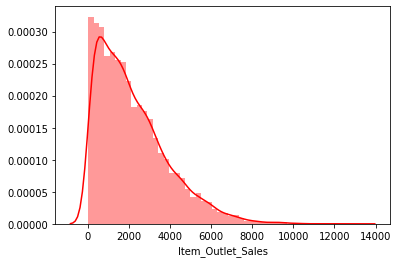

In [20]:
sns.distplot(df1['Item_Outlet_Sales'],color='red')
plt.show()

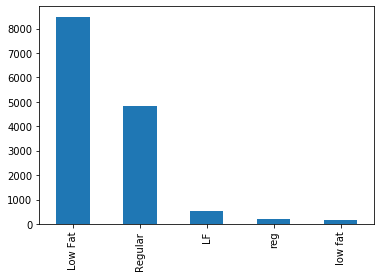

In [21]:
df.Item_Fat_Content.value_counts().plot(kind='bar')
plt.show()

In [22]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
df.Item_Fat_Content=df.Item_Fat_Content.replace(to_replace='LF',value='Low Fat')

In [24]:
df.Item_Fat_Content=df.Item_Fat_Content.replace(to_replace='low fat',value='Low Fat')

In [25]:
df.Item_Fat_Content=df.Item_Fat_Content.replace(to_replace='reg',value='Regular')

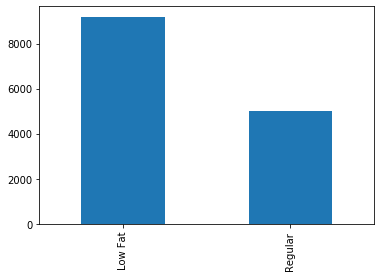

In [26]:
df.Item_Fat_Content.value_counts().plot(kind='bar')
plt.show()

In [27]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [28]:
df.dtypes

Data                          object
Item_Fat_Content              object
Item_ID                       object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
dtype: object

In [29]:
categorical = df.select_dtypes ( include = "object" ).columns
print ( "The categorical variables are:\n" , categorical )
print ( "\n" )
continous = df.select_dtypes ( exclude = "object" ).columns
print ( "The continous variables are:\n" , continous )

The categorical variables are:
 Index(['Data', 'Item_Fat_Content', 'Item_ID', 'Item_Identifier', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type'],
      dtype='object')


The continous variables are:
 Index(['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year'],
      dtype='object')


In [30]:
for i in categorical:
    print ( "Column Name:" , i )
    print ( df [ i ].value_counts ( ) ) 
    d = df [ i ].value_counts ( )
    j = 0
    for i in d.index:
        print ( i , "\t" , round ( ( ( d [ j ] / df.shape [ 0 ] ) * 100  ) , 2 ) , "%" )
        j += 1
    print ( "\n" )

Column Name: Data
train    8523
test     5681
Name: Data, dtype: int64
train 	 60.0 %
test 	 40.0 %


Column Name: Item_Fat_Content
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
Low Fat 	 64.66 %
Regular 	 35.34 %


Column Name: Item_ID
FD    10201
NC     2686
DR     1317
Name: Item_ID, dtype: int64
FD 	 71.82 %
NC 	 18.91 %
DR 	 9.27 %


Column Name: Item_Identifier
FDI16    10
FDJ57    10
NCW29    10
FDF21    10
FDZ48    10
FDP21    10
FDD17    10
FDY28    10
FDN32    10
FDO08    10
FDZ45    10
DRK49    10
FDT13    10
FDC10    10
FDX26    10
NCF54    10
FDA07    10
FDT56    10
NCJ18    10
FDD56    10
FDF58    10
FDS32    10
FDR23    10
FDE24    10
FDX31    10
FDS08    10
FDC21    10
FDQ49    10
FDK33    10
DRJ24    10
         ..
FDP12     8
DRB24     8
FDG29     8
FDT33     8
NCT29     8
FDP08     8
DRG15     8
FDZ34     8
FDZ55     8
NCR18     8
NCN17     8
FDI19     8
NCD07     8
FDY51     8
FDG14     8
FDS16     8
FDI52     8
FDX49     7
FDL50     7
FDM52  

NCI42 	 0.06 %
FDM13 	 0.06 %
FDJ50 	 0.06 %
FDR59 	 0.06 %
NCA17 	 0.06 %
FDG50 	 0.06 %
FDP49 	 0.06 %
FDW51 	 0.06 %
FDC46 	 0.06 %
FDI48 	 0.06 %
DRE48 	 0.06 %
NCC30 	 0.06 %
FDU46 	 0.06 %
FDO19 	 0.06 %
FDY37 	 0.06 %
FDU03 	 0.06 %
FDE51 	 0.06 %
FDQ25 	 0.06 %
FDO37 	 0.06 %
NCL05 	 0.06 %
FDX39 	 0.06 %
NCN26 	 0.06 %
DRL59 	 0.06 %
FDI50 	 0.06 %
NCZ18 	 0.06 %
DRC01 	 0.06 %
FDD32 	 0.06 %
FDX12 	 0.06 %
FDV56 	 0.06 %
FDX07 	 0.06 %
DRH59 	 0.06 %
FDC17 	 0.06 %
FDW45 	 0.06 %
NCO29 	 0.06 %
FDN34 	 0.06 %
FDT16 	 0.06 %
FDA09 	 0.06 %
FDS02 	 0.06 %
NCD19 	 0.06 %
FDS27 	 0.06 %
FDK43 	 0.06 %
FDN31 	 0.06 %
FDZ38 	 0.06 %
FDL22 	 0.06 %
FDQ33 	 0.06 %
FDQ57 	 0.06 %
DRF25 	 0.06 %
FDJ08 	 0.06 %
FDJ48 	 0.06 %
FDA22 	 0.06 %
FDV35 	 0.06 %
FDB27 	 0.06 %
FDI07 	 0.06 %
FDW07 	 0.06 %
FDI21 	 0.06 %
FDR10 	 0.06 %
FDC34 	 0.06 %
FDM33 	 0.06 %
NCX53 	 0.06 %
FDH02 	 0.06 %
FDY26 	 0.06 %
FDS11 	 0.06 %
FDR56 	 0.06 %
FDB11 	 0.06 %
FDQ36 	 0.06 %
DRE37 	 0.06 %
DRL23 	 0.

NCR06 	 0.06 %
FDB37 	 0.06 %
FDJ34 	 0.06 %
FDB02 	 0.06 %
FDE20 	 0.06 %
FDU08 	 0.06 %
NCW41 	 0.06 %
FDB56 	 0.06 %
FDX60 	 0.06 %
NCG55 	 0.06 %
FDS36 	 0.06 %
FDN44 	 0.06 %
FDR25 	 0.06 %
NCZ41 	 0.06 %
DRK11 	 0.06 %
NCW18 	 0.06 %
DRD49 	 0.06 %
FDV27 	 0.06 %
FDT02 	 0.06 %
NCM41 	 0.06 %
FDQ59 	 0.06 %
FDU56 	 0.06 %
FDN04 	 0.06 %
NCG54 	 0.06 %
FDO52 	 0.06 %
FDG05 	 0.06 %
NCB42 	 0.06 %
NCL54 	 0.06 %
FDX02 	 0.06 %
DRM35 	 0.06 %
FDJ09 	 0.06 %
DRI59 	 0.06 %
NCN18 	 0.06 %
FDX11 	 0.06 %
FDN23 	 0.06 %
FDW57 	 0.06 %
FDD03 	 0.06 %
FDS07 	 0.06 %
DRG39 	 0.06 %
NCW17 	 0.06 %
FDN58 	 0.06 %
FDG24 	 0.06 %
DRM49 	 0.06 %
FDK14 	 0.06 %
NCG19 	 0.06 %
FDQ48 	 0.06 %
FDM03 	 0.06 %
FDC16 	 0.06 %
NCP54 	 0.06 %
FDU55 	 0.06 %
FDJ16 	 0.06 %
FDW08 	 0.06 %
DRG36 	 0.06 %
FDR57 	 0.06 %
FDA20 	 0.06 %
FDM01 	 0.06 %
DRC13 	 0.06 %
FDJ04 	 0.06 %
FDP36 	 0.06 %
FDJ27 	 0.06 %
DRJ37 	 0.06 %
FDE32 	 0.06 %
FDC38 	 0.06 %
DRD12 	 0.06 %
FDF35 	 0.06 %
FDS51 	 0.06 %
FDX15 	 0.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 14 columns):
Data                         14204 non-null object
Item_Fat_Content             14204 non-null object
Item_ID                      14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 1.6+ MB


In [32]:
df.isna().sum()

Data                            0
Item_Fat_Content                0
Item_ID                         0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [33]:
### to find null values column name
for i in df.columns:
    if (df[i].isnull().sum())!=0:
        print("{} {}".format(i, df[i].isnull().sum()))

Item_Outlet_Sales 5681
Item_Weight 2439
Outlet_Size 4016


In [34]:
df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [35]:
df.Outlet_Size=df.Outlet_Size.fillna('Medium') ##filling value with mode

In [36]:
df.Item_Weight.mode()

0    17.6
dtype: float64

In [37]:
df.Item_Weight=df.Item_Weight.fillna(df['Item_Weight'].median())  ### filing value wth median

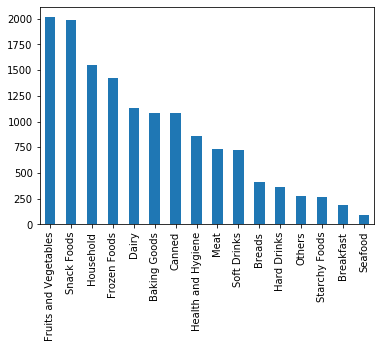

In [38]:
df.Item_Type.value_counts().plot(kind='bar')
plt.show()

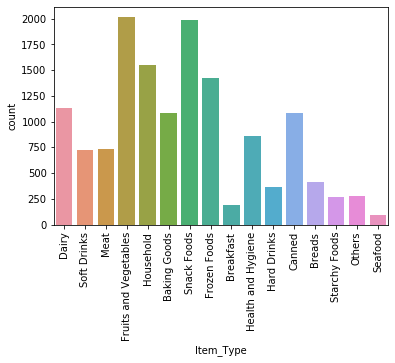

In [39]:
sns.countplot(df['Item_Type'])
plt.xticks(rotation=90)
plt.show()

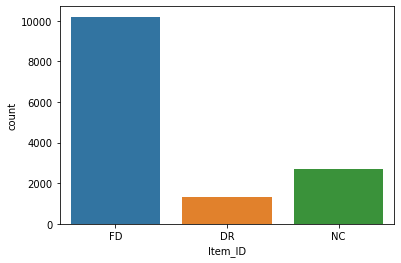

In [40]:
sns.countplot(df['Item_ID'])
plt.show()

In [41]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [42]:
df.columns

Index(['Data', 'Item_Fat_Content', 'Item_ID', 'Item_Identifier', 'Item_MRP',
       'Item_Outlet_Sales', 'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [43]:
df=df.drop('Item_Identifier',axis=1)

In [44]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Data_train,Item_Fat_Content_Regular,Item_ID_FD,Item_ID_NC,Item_Type_Breads,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,3735.1380,0.016047,9.30,1999,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
1,48.2692,443.4228,0.019278,5.92,2009,1,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,141.6180,2097.2700,0.016760,17.50,1999,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
3,182.0950,732.3800,0.000000,19.20,1998,1,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0
4,53.8614,994.7052,0.000000,8.93,1987,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [45]:
df.shape

(14204, 40)

In [46]:
## dividing dataset in train and test
df1=df[df['Data_train']==1]
df2=df[df['Data_train']==0]

In [47]:
## deleting train column 

df1=df1.drop('Data_train',axis=1)
df2=df2.drop(['Data_train','Item_Outlet_Sales'],axis=1)

In [48]:
df1.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_ID_FD,Item_ID_NC,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,3735.1380,0.016047,9.30,1999,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,48.2692,443.4228,0.019278,5.92,2009,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,141.6180,2097.2700,0.016760,17.50,1999,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,182.0950,732.3800,0.000000,19.20,1998,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,53.8614,994.7052,0.000000,8.93,1987,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [49]:
df2.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_ID_FD,Item_ID_NC,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,107.8622,0.007565,20.750,1999,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,87.3198,0.038428,8.300,2007,1,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,241.7538,0.099575,14.600,1998,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,155.0340,0.015388,7.315,2007,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,234.2300,0.118599,12.600,1985,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [50]:
print('Shape of Train dataset',df1.shape)
print('Shape of Test dataset',df2.shape)

Shape of Train dataset (8523, 39)
Shape of Test dataset (5681, 38)


## LINEAR REGRESSION

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [52]:
X=df1.drop('Item_Outlet_Sales',axis=1)
y=df1['Item_Outlet_Sales']

In [53]:
LR=LinearRegression()

In [54]:
LR.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pred=LR.predict(df2)
y_pred=abs(y_pred)

In [56]:
test_1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [57]:
results = pd.DataFrame({'Item_Identifier':test_1['Item_Identifier'], 'Outlet_Identifier':test_1['Outlet_Identifier'],
                        'Item_Outlet_Sales':y_pred})
results.to_csv("Big_Mart_LR.csv", index = False)

## Lasso

In [58]:
from sklearn.model_selection import cross_val_score,cross_val_predict,KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
n_alphas = 50
alphas = np.linspace(0.1, 1, n_alphas)

lasso_cv = LassoCV(alphas = alphas, cv = 3, random_state = 1)

lasso_cv.fit(X, y)

LassoCV(alphas=array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734694, 0.48571429, 0.50408163, 0.52244898, 0.54081633,
       0.55918367, 0.57755102, 0.59591837, 0.61428571, 0.63265306,
       0.65102...
       0.74285714, 0.76122449, 0.77959184, 0.79795918, 0.81632653,
       0.83469388, 0.85306122, 0.87142857, 0.88979592, 0.90816327,
       0.92653061, 0.94489796, 0.96326531, 0.98163265, 1.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=1, selection='cyclic', tol=0.0001,
        verbose=False)

In [60]:
lasso_cv.alpha_

1.0

In [61]:
n_alphas = 100
alphas = np.linspace(0.01, 15 , n_alphas)

lasso_cv = LassoCV(alphas = alphas, cv = 3, random_state = 1)

lasso_cv.fit(X, y)

LassoCV(alphas=array([1.00000000e-02, 1.61414141e-01, 3.12828283e-01, 4.64242424e-01,
       6.15656566e-01, 7.67070707e-01, 9.18484848e-01, 1.06989899e+00,
       1.22131313e+00, 1.37272727e+00, 1.52414141e+00, 1.67555556e+00,
       1.82696970e+00, 1.97838384e+00, 2.12979798e+00, 2.28121212e+00,
       2.43262626e+00, 2.58404040e+00, 2.73545455e+00, 2.88686869e+00,
       3.03828283e+00, 3.18969697e+0...
       1.33344444e+01, 1.34858586e+01, 1.36372727e+01, 1.37886869e+01,
       1.39401010e+01, 1.40915152e+01, 1.42429293e+01, 1.43943434e+01,
       1.45457576e+01, 1.46971717e+01, 1.48485859e+01, 1.50000000e+01]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=1, selection='cyclic', tol=0.0001,
        verbose=False)

In [62]:
lasso_cv.alpha_

3.4925252525252524

In [63]:
lasso = Lasso(alpha = 3.4925252525252524)

lasso.fit(X, y)

Lasso(alpha=3.4925252525252524, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
y1=lasso.predict(df2)

In [65]:
results = pd.DataFrame({'Item_Identifier':test_1['Item_Identifier'], 'Outlet_Identifier':test_1['Outlet_Identifier'],
                        'Item_Outlet_Sales':y1})
results.to_csv("Big_Mart_LR_lasso.csv", index = False)

## Ridge

In [66]:
n_alphas = 100
alphas = np.logspace(-2, 0, n_alphas)

ridge_cv = RidgeCV(alphas = alphas, cv = 3)

ridge_cv.fit(X, y)

RidgeCV(alphas=array([0.01      , 0.01047616, 0.01097499, 0.01149757, 0.01204504,
       0.01261857, 0.01321941, 0.01384886, 0.01450829, 0.01519911,
       0.01592283, 0.01668101, 0.01747528, 0.01830738, 0.0191791 ,
       0.02009233, 0.02104904, 0.02205131, 0.0231013 , 0.02420128,
       0.02535364, 0.02656088, 0.02782559, 0.02915053, 0.03053856,
       0.03199267, 0.03351603, 0.03511192, 0.0367838 , 0.03853529,
       0.04037...
       0.32745492, 0.34304693, 0.35938137, 0.37649358, 0.39442061,
       0.41320124, 0.43287613, 0.45348785, 0.47508102, 0.49770236,
       0.52140083, 0.54622772, 0.57223677, 0.59948425, 0.62802914,
       0.65793322, 0.68926121, 0.7220809 , 0.75646333, 0.7924829 ,
       0.83021757, 0.869749  , 0.91116276, 0.95454846, 1.        ]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [67]:
ridge_cv.alpha_

1.0

In [68]:
n_alphas = 100
alphas = np.logspace(-4, 15 , n_alphas)

ridge_cv = RidgeCV(alphas = alphas, cv = 3)

ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-04, 1.55567614e-04, 2.42012826e-04, 3.76493581e-04,
       5.85702082e-04, 9.11162756e-04, 1.41747416e-03, 2.20513074e-03,
       3.43046929e-03, 5.33669923e-03, 8.30217568e-03, 1.29154967e-02,
       2.00923300e-02, 3.12571585e-02, 4.86260158e-02, 7.56463328e-02,
       1.17681195e-01, 1.83073828e-01, 2.84803587e-01, 4.43062146e-01,
       6.89261210e-01, 1.07226722e+0...
       2.25701972e+11, 3.51119173e+11, 5.46227722e+11, 8.49753436e+11,
       1.32194115e+12, 2.05651231e+12, 3.19926714e+12, 4.97702356e+12,
       7.74263683e+12, 1.20450354e+13, 1.87381742e+13, 2.91505306e+13,
       4.53487851e+13, 7.05480231e+13, 1.09749877e+14, 1.70735265e+14,
       2.65608778e+14, 4.13201240e+14, 6.42807312e+14, 1.00000000e+15]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [69]:
ridge_cv.alpha_

9.770099572992246

In [70]:
ridge = Ridge(alpha = 9.770099572992246)

ridge.fit(X, y)

Ridge(alpha=9.770099572992246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
y11=ridge.predict(df2)

In [72]:
results = pd.DataFrame({'Item_Identifier':test_1['Item_Identifier'], 'Outlet_Identifier':test_1['Outlet_Identifier'],
                        'Item_Outlet_Sales':y11})
results.to_csv("Big_Mart_LR_ridge.csv", index = False)

## OLS

In [73]:
X=df1.drop('Item_Outlet_Sales',axis=1)
y=df1['Item_Outlet_Sales']
Xc=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     378.5
Date:                Sun, 15 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:47:58   Log-Likelihood:                -71988.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8493   BIC:                         1.442e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_MRP                           15.5706      0.198     78.588      0.000      15.182      15.959
Item_Visibility                  -300.0671    248.956     -1.205      0.228    -788.081     187.947
Item_Weight                        -0.5200      2.915     -0.178      0.858      -6.234       5.194
Outlet_Establishment_Year          -0.5779      0.063     -9.142      0.000      -0.702      -0.454
Item_Fat_Content_Regular           42.1183     28.462      1.480      0.139     -13.674      97.911
Item_ID_FD                        -44.4086    108.289     -0.410      0.682    -256.681     167.864
Item_ID_NC                        -50.6257     91.202     -0.555      0.579    -229.403     128.152
Item_Type_Breads                    5.1355     84.048      0.061      0.951    -159.619     169.890
Item_Type_Breakfast                 7.1944    116.611      0.062      0.951    -221.392     235.780
Item_Type_Canned                   25.4824     62.769      0.406      0.685     -97.560     148.525
Item_Type_Dairy                   -49.7940     66.050     -0.754      0.451    -179.269      79.681
Item_Type_Frozen Foods            -28.0431     58.868     -0.476      0.634    -143.440      87.353
Item_Type_Fruits and Vegetables    29.7242     54.960      0.541      0.589     -78.011     137.459
Item_Type_Hard Drinks             -44.0503    139.665     -0.315      0.752    -317.827     229.727
Item_Type_Health and Hygiene       -3.6327     52.724     -0.069      0.945    -106.984      99.719
Item_Type_Household               -32.3984     47.709     -0.679      0.497    -125.921      61.124
Item_Type_Meat                     -0.6476     70.652     -0.009      0.993    -139.143     137.847
Item_Type_Others                  -14.5946     73.002     -0.200      0.842    -157.696     128.507
Item_Type_Seafood                 184.8768    148.011      1.249      0.212    -105.261     475.014
Item_Type_Snack Foods             -11.3978     55.250     -0.206      0.837    -119.701      96.905
Item_Type_Soft Drinks             -71.6811    128.056     -0.560      0.576    -322.702     179.340
Item_Type_Starchy Foods            21.3952    103.040      0.208      0.836    -180.588     223.379
Outlet_Identifier_OUT013          423.9523     24.057     17.623      0.000     376.796     471.109
Outlet_Identifier_OUT017          159.6522     29.691      5.377      0.000     101.451     217.853
Outlet_Identifier_OUT018          817.5569     30.762     26.577      0.000     757.256     877.858
Outlet_Identifier_OUT019         -453.6378     32.123    -14.122      0.000    -516.607    -390.669
Outlet_Identifier_OUT027         1674.1084     30.689     54.552      0.000    1613.951    1734.265
Outlet_Identifier_OUT035           99.5217     27.315      3.643      0.000      45

In [74]:
cols = X.columns.tolist()

while len(cols)>0:
    
    x_1 = X[cols]
    model = sm.OLS(y, x_1).fit()
    p = pd.Series(model.pvalues.values, index = cols)
    pmax = max(p)
    feature_max_p = p.idxmax()
    
    if(pmax > 0.05):
        cols.remove(feature_max_p)
    else:
        break

In [75]:
print(len(cols))
print(cols)

18
['Item_MRP', 'Outlet_Establishment_Year', 'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']


In [76]:
model = sm.OLS(y, x_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     998.5
Date:                Sun, 15 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:47:59   Log-Likelihood:                -71991.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8511   BIC:                         1.441e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_MRP                         15.5587      0.196     79.260      0.000      15.174      15.943
Outlet_Establishment_Year        -0.6216      0.019    -32.773      0.000      -0.659      -0.584
Item_Fat_Content_Regular         50.3786     25.580      1.969      0.049       0.235     100.522
Outlet_Identifier_OUT013        425.5096     24.321     17.496      0.000     377.834     473.185
Outlet_Identifier_OUT017        174.4805     52.402      3.330      0.001      71.761     277.200
Outlet_Identifier_OUT018        824.4210     30.302     27.207      0.000     765.021     883.821
Outlet_Identifier_OUT019       -460.3957     33.818    -13.614      0.000    -526.688    -394.104
Outlet_Identifier_OUT027       1680.8997     30.194     55.670      0.000    1621.712    1740.087
Outlet_Identifier_OUT035        108.2549     35.680      3.034      0.002      38.313     178.197
Outlet_Identifier_OUT046        194.4242     28.982      6.708      0.000     137.613     251.236
Outlet_Identifier_OUT049        398.8979     32.257     12.366      0.000     335.666     462.129
Outlet_Location_Type_Tier 2     235.3798     25.320      9.296      0.000     185.746     285.014
Outlet_Location_Type_Tier 3    -363.6801     28.791    -12.632      0.000    -420.118    -307.242
Outlet_Size_Medium             -263.1668     20.754    -12.680      0.000    -303.849    -222.484
Outlet_Size_Small              -157.7166     16.821     -9.376      0.000    -190.690    -124.743
Outlet_Type_Supermarket Type1  1254.2115     26.544     47.250      0.000    1202.179    1306.244
Outlet_Type_Supermarket Type2   824.4210     30.302     27.207      0.000     765.021     883.821
Outlet_Type_Supermarket Type3  1680.8997     30.194     55.670      0.000    1621.712    1740.087
==============================================================================
Omnibus:                      966.646   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2314.034
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       5.173   Cond. No.                     4.31e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
### taking only those column which are good in the ols model
imp_cols=df2[['Item_MRP', 'Outlet_Establishment_Year', 'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT013', 
              'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 
              'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
              'Outlet_Location_Type_Tier 3', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Type_Supermarket Type1', 
              'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']]

In [78]:
y_pred1=model.predict(imp_cols)
y_pred1=abs(y_pred1)

In [79]:
results = pd.DataFrame({'Item_Identifier':test_1['Item_Identifier'], 'Outlet_Identifier':test_1['Outlet_Identifier'],
                        'Item_Outlet_Sales':y_pred1})
results.to_csv("Big_Mart_ols.csv", index = False)

### after using standardscalar

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
df2_t=sc.fit_transform(df2)

In [81]:
x=pd.DataFrame(x,columns=X.columns)
test=pd.DataFrame(df2_t,columns=df2.columns)

In [82]:
X=df1.drop('Item_Outlet_Sales',axis=1)
y=df1['Item_Outlet_Sales']
Xc=sm.add_constant(X)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.826
Method:                 Least Squares   F-statistic:                              1401.
Date:                Sun, 15 Mar 2020   Prob (F-statistic):                        0.00
Time:                        11:48:00   Log-Likelihood:                         -72172.
No. Observations:                8523   AIC:                                  1.444e+05
Df Residuals:                    8494   BIC:                                  1.446e+05
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_MRP                          966.0954     12.607     76.631      0.000     941.382     990.808
Item_Visibility                   -26.0850     13.125     -1.987      0.047     -51.814      -0.356
Item_Weight                        -7.8877     12.590     -0.626      0.531     -32.568      16.792
Outlet_Establishment_Year        1.885e+17   1.08e+15    174.464      0.000    1.86e+17    1.91e+17
Item_Fat_Content_Regular           12.0612     13.896      0.868      0.385     -15.179      39.301
Item_ID_FD                          9.4615     49.756      0.190      0.849     -88.073     106.996
Item_ID_NC                       -1.41e+15   8.08e+12   -174.464      0.000   -1.43e+15   -1.39e+15
Item_Type_Breads                   19.4131     14.520      1.337      0.181      -9.049      47.876
Item_Type_Breakfast                 4.1543     13.449      0.309      0.757     -22.209      30.518
Item_Type_Canned                   20.5573     17.012      1.208      0.227     -12.790      53.905
Item_Type_Dairy                     6.4443     18.312      0.352      0.725     -29.452      42.341
Item_Type_Frozen Foods            -30.4974     18.081     -1.687      0.092     -65.941       4.946
Item_Type_Fruits and Vegetables    39.7946     19.749      2.015      0.044       1.082      78.507
Item_Type_Hard Drinks              -8.5594     22.328     -0.383      0.701     -52.328      35.209
Item_Type_Health and Hygiene     8.644e+14   4.95e+12    174.464      0.000    8.55e+14    8.74e+14
Item_Type_Household              1.115e+15   6.39e+12    174.464      0.000     1.1e+15    1.13e+15
Item_Type_Meat                     82.9042     15.721      5.273      0.000      52.087     113.722
Item_Type_Others                 5.035e+14   2.89e+12    174.464      0.000    4.98e+14    5.09e+14
Item_Type_Seafood                  50.6787     13.058      3.881      0.000      25.082      76.276
Item_Type_Snack Foods              51.4353     19.638      2.619      0.009      12.939      89.931
Item_Type_Soft Drinks              50.4649     29.111      1.734      0.083      -6.599     107.529
Item_Type_Starchy Foods            55.2941     13.757      4.019      0.000      28.328      82.261
Outlet_Identifier_OUT013         5.633e+16   3.23e+14    174.464      0.000    5.57e+16     5.7e+16
Outlet_Identifier_OUT017          -2.9e+16   1.66e+14   -174.464      0.000   -2.93e+16   -2.87e+16
Outlet_Identifier_OUT018        -3.838e+16    2.2e+14   -174.464      0.000   -3.88e+16    -3.8e+16
Outlet_Identifier_OUT019         5.659e+16   3.24e+14    174.464      0.000     5.6e+16    5.72e+16
Outlet_Identifier_OUT027         4.553e+16   2.61e+14    174.464      0.000     4.5e

In [83]:
cols = x.columns.tolist()

while len(cols)>0:
    
    x_2 = x[cols]
    model = sm.OLS(y, x_2).fit()
    p = pd.Series(model.pvalues.values, index = cols)
    pmax = max(p)
    feature_max_p = p.idxmax()
    
    if(pmax > 0.05):
        cols.remove(feature_max_p)
    else:
        break

In [84]:
model = sm.OLS(y, x_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              3226.
Date:                Sun, 15 Mar 2020   Prob (F-statistic):                        0.00
Time:                        11:48:01   Log-Likelihood:                         -72066.
No. Observations:                8523   AIC:                                  1.442e+05
Df Residuals:                    8510   BIC:                                  1.443e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_MRP                        964.1003     12.357     78.022      0.000     939.878     988.323
Outlet_Establishment_Year      1.884e+17   1.07e+15    176.846      0.000    1.86e+17    1.91e+17
Item_ID_NC                    -1.857e+15   1.05e+13   -176.846      0.000   -1.88e+15   -1.84e+15
Item_Type_Health and Hygiene   1.138e+15   6.44e+12    176.846      0.000    1.13e+15    1.15e+15
Item_Type_Household            1.469e+15   8.31e+12    176.846      0.000    1.45e+15    1.49e+15
Item_Type_Others               6.631e+14   3.75e+12    176.846      0.000    6.56e+14     6.7e+14
Outlet_Identifier_OUT013       5.627e+16   3.18e+14    176.846      0.000    5.56e+16    5.69e+16
Outlet_Identifier_OUT017      -2.806e+16   1.59e+14   -176.846      0.000   -2.84e+16   -2.77e+16
Outlet_Identifier_OUT018      -3.858e+16   2.18e+14   -176.846      0.000    -3.9e+16   -3.82e+16
Outlet_Identifier_OUT019        5.68e+16   3.21e+14    176.846      0.000    5.62e+16    5.74e+16
Outlet_Identifier_OUT027       4.566e+16   2.58e+14    176.846      0.000    4.52e+16    4.62e+16
Outlet_Identifier_OUT035       -3.27e+16   1.85e+14   -176.846      0.000   -3.31e+16   -3.23e+16
Outlet_Identifier_OUT045       6.975e+15   3.94e+13    176.846      0.000     6.9e+15    7.05e+15
Outlet_Identifier_OUT046       -8.28e+15   4.68e+13   -176.846      0.000   -8.37e+15   -8.19e+15
Outlet_Identifier_OUT049       3.327e+15   1.88e+13    176.846      0.000    3.29e+15    3.36e+15
Outlet_Location_Type_Tier 2   -3.717e+16    2.1e+14   -176.846      0.000   -3.76e+16   -3.68e+16
Outlet_Location_Type_Tier 3    1.233e+16   6.97e+13    176.846      0.000    1.22e+16    1.25e+16
Outlet_Size_Medium            -3.669e+16   2.07e+14   -176.846      0.000   -3.71e+16   -3.63e+16
Outlet_Size_Small              3.144e+15   1.78e+13    176.846      0.000    3.11e+15    3.18e+15
Outlet_Type_Supermarket Type1 -3.778e+15   2.14e+13   -176.846      0.000   -3.82e+15   -3.74e+15
Outlet_Type_Supermarket Type2 -3.855e+16   2.18e+14   -176.846      0.000    -3.9e+16   -3.81e+16
Outlet_Type_Supermarket Type3  4.579e+16   2.59e+14    176.846      0.000    4.53e+16    4.63e+16
==============================================================================
Omnibus:                     1021.128   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2445.192
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                       5.216   Cond. No.                     1.80e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance ma

In [85]:
print(len(cols))
print(cols)

22
['Item_MRP', 'Outlet_Establishment_Year', 'Item_ID_NC', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Others', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']


In [86]:
imp=test[['Item_MRP', 'Outlet_Establishment_Year', 'Item_ID_NC', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 
          'Item_Type_Others', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 
          'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 
          'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
          'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 
          'Outlet_Type_Supermarket Type3']]

In [87]:
y_pred2=model.predict(imp)
y_pred2=abs(y_pred2)

In [88]:
results = pd.DataFrame({'Item_Identifier':test_1['Item_Identifier'], 'Outlet_Identifier':test_1['Outlet_Identifier'],
                        'Item_Outlet_Sales':y_pred2})
results.to_csv("Big_Mart_ols_std.csv", index = False)

## XGBOOST

In [89]:
import xgboost as xgb

x_dmatrix=xgb.DMatrix(data=x_2 ,label=y)

In [90]:
params={"eta"    : 0.1 ,
        'objective':'reg:squarederror',
         "max_depth"        : 8,
         "min_child_weight" : 3, 
         "gamma"            : 10,
         "colsample_bytree" :0.5,
        }

In [91]:
cv_results = xgb.cv(dtrain=x_dmatrix, params=params, nfold=5,
                    num_boost_round=1000,early_stopping_rounds=50,metrics="rmse", as_pandas=True, seed=0)

cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,985.113770,14.010994,1102.661890,25.306807
46,983.436352,13.866991,1103.023559,25.368206
47,982.223694,13.876404,1103.020679,25.501541
48,980.946692,13.893098,1103.009839,25.629217
49,978.142237,12.677993,1102.596997,26.073513


In [92]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.1, min_child_weight = 3,
                max_depth = 8, alpha = 1, n_estimators =980    ,gamma=10)

xg_reg.fit(x_2,y)

[11:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=1, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=10, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=980, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=1, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [93]:
y_train_pred=xg_reg.predict(imp)
y_train_pred

array([1543.6216, 1441.0521,  685.2692, ..., 1410.8397, 3380.5637,
       1362.8514], dtype=float32)

In [94]:
results = pd.DataFrame({'Item_Identifier':test_1['Item_Identifier'], 'Outlet_Identifier':test_1['Outlet_Identifier'],
                        'Item_Outlet_Sales':y_train_pred})
results.to_csv("Big_Mart_xgboost1.csv", index = False)

## KNN

In [95]:
knn = KNeighborsRegressor()
knn_params = {'n_neighbors':np.arange(3,20), 'weights':['uniform','distance']}
gscv = GridSearchCV(knn, knn_params, cv=3, scoring='neg_mean_squared_error')
X_scaled = sc.fit_transform(x_1)
gscv.fit(x_1, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [96]:
gscv.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [97]:
knn = KNeighborsRegressor(n_neighbors=7   , weights='uniform')
kfold = KFold(shuffle=True, n_splits=3, random_state=0)
cv_results = cross_val_score(knn, x_1, y, cv=kfold, scoring='neg_mean_squared_error')
print('%s : %f(%f)' %('KNeighborsRegressor:',np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))

KNeighborsRegressor: : 1195.130845(246.777812)


## Adaboost Decision tree

In [98]:
RMSE = []
for ne in np.arange(1,50):
    AB_DT = AdaBoostRegressor(n_estimators=ne, random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    mse = cross_val_score(AB_DT, x_1, y, cv=kfold, scoring='neg_mean_squared_error')
    RMSE.append(np.mean(np.sqrt(np.abs(mse))))
print(RMSE)

[1261.460084688135, 1261.460084688135, 1233.2883208621804, 1218.946886790748, 1226.1393789232875, 1222.6074742565818, 1229.987369523253, 1236.2603305376451, 1230.6511718340234, 1238.3747004892205, 1239.0052482712754, 1244.5644276819933, 1245.8029788103488, 1248.1741355881788, 1252.0836576113547, 1256.0567117637097, 1254.028128637983, 1252.6881982538118, 1252.9939266877966, 1252.9019020242822, 1259.350353344828, 1252.8662299943496, 1254.608886427078, 1255.6543060161473, 1253.1962392693918, 1255.711782913685, 1259.6120925128719, 1264.6338351883287, 1263.199782945295, 1259.5763352956565, 1259.1820503903598, 1262.7847229683734, 1265.7988847116887, 1264.9164001757044, 1265.5248221896536, 1266.0658029510341, 1266.263986857547, 1265.890222140572, 1267.501777249712, 1269.011902276391, 1270.3886004222315, 1271.048296156403, 1270.9244705358674, 1271.5658238362364, 1271.5083805476736, 1271.8233013409981, 1272.5041395032447, 1272.8257788600079, 1272.8955011197074]


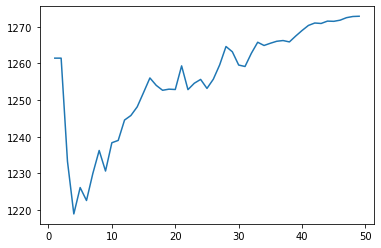

In [99]:
plt.plot(np.arange(1,50),RMSE)
plt.show()

In [100]:
VE = []
BE = []
LR=LinearRegression()
for ne in np.arange(1,50):
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    mse = cross_val_score(LR, x_1, y, cv=kfold, scoring='neg_mean_squared_error')
    VE.append(np.var(np.sqrt(np.abs(mse)), ddof=1))
    BE.append(np.mean(np.sqrt(np.abs(mse))))

In [101]:
print('Lowest Bias Error:',np.min(BE),' n_estimator:',np.argmin(BE)+1,' Variance Error:',VE[np.argmin(BE)])
print('Lowest Variance Error:',np.min(VE),' n_estimator:',np.argmin(VE)+1,' Bias Error:',BE[np.argmin(VE)])

Lowest Bias Error: 1128.6872364126434  n_estimator: 1  Variance Error: 324.7543316712258
Lowest Variance Error: 324.7543316712258  n_estimator: 1  Bias Error: 1128.6872364126434


In [102]:
LR=LinearRegression()
knn = KNeighborsRegressor(n_neighbors=7   , weights='uniform')
AB_DT = AdaBoostRegressor(n_estimators=1, random_state=0)

MVLR : 1128.687236(324.754332)
MVknn : 1195.130845(246.777812)
AB_DT : 1261.460085(151.560455)


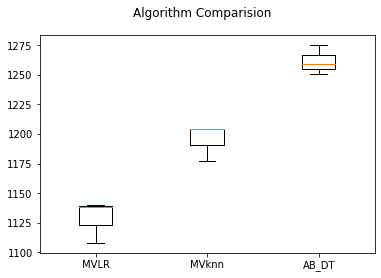

In [103]:
models = []
models.append(('MVLR',LR))
models.append(('MVknn',knn))
models.append(('AB_DT',AB_DT))



results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True, n_splits=3, random_state=0)
    cv_results = cross_val_score(model, x_1, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s : %f(%f)' %(name,np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
# boxplot algorithm comparision
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

MVLR : 1128.687236(324.754332)


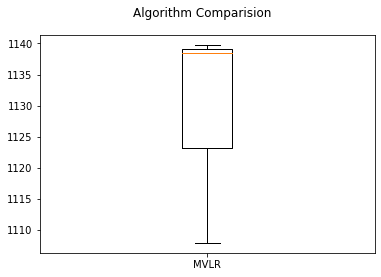

In [104]:
models = []
models.append(('MVLR',LR))


results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True, n_splits=3, random_state=0)
    cv_results = cross_val_score(model, x_1, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s : %f(%f)' %(name,np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
# boxplot algorithm comparision
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [106]:
model.fit(x_1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
T1=model.predict(imp_cols)

In [108]:
results = pd.DataFrame({'Item_Identifier':test_1['Item_Identifier'], 'Outlet_Identifier':test_1['Outlet_Identifier'],
                        'Item_Outlet_Sales':T1})
results.to_csv("Big_Mart_xgboost1.csv", index = False)

VE = []
BE = []
RF=RandomForestRegressor(n_estimators=1,random_state=0, criterion='mae')
for ne in np.arange(1,50):
    AB_RF = AdaBoostRegressor(base_estimator=RF,n_estimators=ne, random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    mse = cross_val_score(AB_RF, x_1, y, cv=kfold, scoring='neg_mean_squared_error')
    BE.append(np.mean(np.sqrt(np.abs(mse))))
    VE.append(np.var(np.sqrt(np.abs(mse)), ddof=1))

In [114]:
VE = []
BE = []

for ne in np.arange(1,30):
    AB_LR = AdaBoostRegressor(base_estimator=LR,n_estimators=ne, random_state=0)
    kfold = KFold(shuffle=True,n_splits=5 ,random_state=0)
    mse = cross_val_score(AB_LR, x_1, y, cv=kfold, scoring='neg_mean_squared_error')
    BE.append(np.mean(np.sqrt(np.abs(mse))))
    VE.append(np.var(np.sqrt(np.abs(mse)), ddof=1))

In [115]:
print('Lowest Bias Error:',np.min(BE),' n_estimator:',np.argmin(BE)+1,' Variance Error:',VE[np.argmin(BE)])
print('Lowest Variance Error:',np.min(VE),' n_estimator:',np.argmin(VE)+1,' Bias Error:',BE[np.argmin(VE)])

Lowest Bias Error: 1129.5652971498919  n_estimator: 1  Variance Error: 1099.9573878372664
Lowest Variance Error: 377.7668116021322  n_estimator: 13  Bias Error: 1165.5501994219314


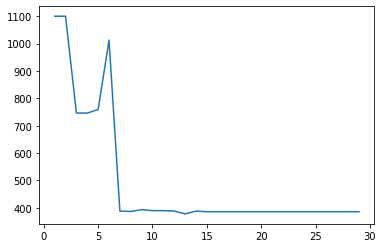

In [116]:
plt.plot(np.arange(1,30),VE)
plt.show()

In [117]:
 AB_LR = AdaBoostRegressor(base_estimator=LR,n_estimators=13 , random_state=0)
 AB_LR1 = AdaBoostRegressor(base_estimator=LR,n_estimators=1 , random_state=0)

MVLR : 1128.687236(324.754332)
ADABOOST_LR : 1167.784518(846.366737)
ADABOOST_LR1 : 1131.461269(314.565263)


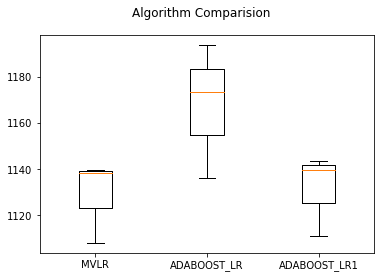

In [118]:
models = []
models.append(('MVLR',LR))
models.append(('ADABOOST_LR',AB_LR))
models.append(('ADABOOST_LR1',AB_LR1))

results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True, n_splits=3, random_state=0)
    cv_results = cross_val_score(model, x_1, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s : %f(%f)' %(name,np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
# boxplot algorithm comparision
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ADABOOST_LR : 1167.784518(846.366737)


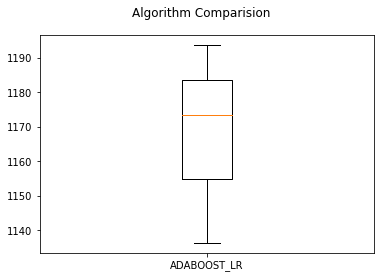

In [119]:
models = []
models.append(('ADABOOST_LR',AB_LR))

results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True, n_splits=3, random_state=0)
    cv_results = cross_val_score(model, x_1, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s : %f(%f)' %(name,np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
# boxplot algorithm comparision
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [120]:
model.fit(x_1,y)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=1.0, loss='linear', n_estimators=13,
                  random_state=0)

In [121]:
T2=model.predict(imp_cols)

In [122]:
results = pd.DataFrame({'Item_Identifier':test_1['Item_Identifier'], 'Outlet_Identifier':test_1['Outlet_Identifier'],
                        'Item_Outlet_Sales':T2})
results.to_csv("Big_Mart_AB_LR.csv", index = False)

ADABOOST_LR1 : 1131.461269(314.565263)


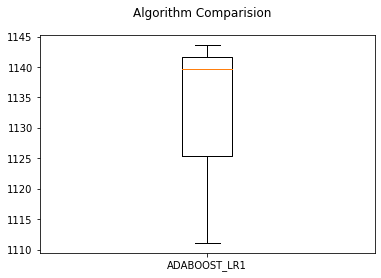

In [123]:
models = []
models.append(('ADABOOST_LR1',AB_LR1))

results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True, n_splits=3, random_state=0)
    cv_results = cross_val_score(model, x_1, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s : %f(%f)' %(name,np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
# boxplot algorithm comparision
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [124]:
model.fit(x_1,y)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=1.0, loss='linear', n_estimators=1,
                  random_state=0)

In [125]:
T3=model.predict(imp_cols)

In [126]:
results = pd.DataFrame({'Item_Identifier':test_1['Item_Identifier'], 'Outlet_Identifier':test_1['Outlet_Identifier'],
                        'Item_Outlet_Sales':T3})
results.to_csv("Big_Mart_AB_LR1.csv", index = False)

## BAGGING

In [127]:
VE = []
BE = []
GBoost=GradientBoostingRegressor()
for ne in np.arange(1,20):
    kfold = KFold(shuffle=True,n_splits=5 ,random_state=0)
    mse = cross_val_score(GBoost, x_1, y, cv=kfold, scoring='neg_mean_squared_error')
    VE.append(np.var(np.sqrt(np.abs(mse)), ddof=1))
    BE.append(np.mean(np.sqrt(np.abs(mse))))

In [129]:
print('Lowest Bias Error:',np.min(BE),' n_estimator:',np.argmin(BE)+1,' Variance Error:',VE[np.argmin(BE)])
print('Lowest Variance Error:',np.min(VE),' n_estimator:',np.argmin(VE)+1,' Bias Error:',BE[np.argmin(VE)])

Lowest Bias Error: 1087.6549059515394  n_estimator: 8  Variance Error: 1016.597774552009
Lowest Variance Error: 1016.597774552009  n_estimator: 8  Bias Error: 1087.6549059515394


In [130]:
GBoost=GradientBoostingRegressor(n_estimators=8,random_state=0)

In [131]:
GBoost.fit(x_1,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=8,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [132]:
t1=GBoost.predict(imp_cols)

In [133]:
results = pd.DataFrame({'Item_Identifier':test_1['Item_Identifier'], 'Outlet_Identifier':test_1['Outlet_Identifier'],
                        'Item_Outlet_Sales':t1})
results.to_csv("Big_Mart_gradient.csv", index = False)

In [ ]:
## bagging

In [134]:
VE = []
BE = []

for ne in np.arange(1,30):
    BG_LR = BaggingRegressor(base_estimator=LR,n_estimators=ne, random_state=0)
    kfold = KFold(shuffle=True,n_splits=5 ,random_state=0)
    mse = cross_val_score(BG_LR, x_1, y, cv=kfold, scoring='neg_mean_squared_error')
    BE.append(np.mean(np.sqrt(np.abs(mse))))
    VE.append(np.var(np.sqrt(np.abs(mse)), ddof=1))

In [135]:
print('Lowest Bias Error:',np.min(BE),' n_estimator:',np.argmin(BE)+1,' Variance Error:',VE[np.argmin(BE)])
print('Lowest Variance Error:',np.min(VE),' n_estimator:',np.argmin(VE)+1,' Bias Error:',BE[np.argmin(VE)])

Lowest Bias Error: 1128.5137320775957  n_estimator: 9  Variance Error: 1048.0470523683623
Lowest Variance Error: 1027.3151001791098  n_estimator: 2  Bias Error: 1129.2863747872532


In [136]:
BG_LR = BaggingRegressor(base_estimator=LR,n_estimators=9 , random_state=0)
BG_LR1 = BaggingRegressor(base_estimator=LR,n_estimators=2 , random_state=0)

In [140]:
BG_LR.fit(x_1,y)


BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=9, n_jobs=None, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [139]:
BG_LR1.fit(x_1,y)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=2, n_jobs=None, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [141]:
bg=BG_LR.predict(imp_cols)
bg1=BG_LR1.predict(imp_cols)

In [142]:
results = pd.DataFrame({'Item_Identifier':test_1['Item_Identifier'], 'Outlet_Identifier':test_1['Outlet_Identifier'],
                        'Item_Outlet_Sales':bg})
results.to_csv("Big_Mart_bagging.csv", index = False)

In [143]:
results = pd.DataFrame({'Item_Identifier':test_1['Item_Identifier'], 'Outlet_Identifier':test_1['Outlet_Identifier'],
                        'Item_Outlet_Sales':bg1})
results.to_csv("Big_Mart_bagging_1.csv", index = False)